Last updated: 15 Feb 2023

# 👋 PyCaret Regression Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [88]:
pip install pycaret[full]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.3/325.3 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [ ]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [2]:
import pandas as pd
df_wine = pd.read_csv('/content/winequality-white.csv',sep=';')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
print(df_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [4]:
print(df_wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [5]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(df_wine, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [6]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [7]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [8]:
# init setup on exp
exp.setup(df_wine, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [9]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2268,0.0976,0.3112,0.9345,0.0270,0.0216,3.6290
lightgbm,Light Gradient Boosting Machine,0.2440,0.1098,0.3304,0.9265,0.0286,0.0232,0.6240
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.2100
rf,Random Forest Regressor,0.2449,0.1242,0.3510,0.9167,0.0302,0.0231,2.3090
et,Extra Trees Regressor,0.2261,0.1252,0.3522,0.9160,0.0303,0.0213,1.1160
gbr,Gradient Boosting Regressor,0.2969,0.1538,0.3913,0.8967,0.0339,0.0284,0.8140
dt,Decision Tree Regressor,0.3049,0.2404,0.4888,0.8389,0.0420,0.0288,0.0550
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.7310
br,Bayesian Ridge,0.3045,0.2410,0.4516,0.8337,0.0355,0.0293,0.0320
ada,AdaBoost Regressor,0.4811,0.3440,0.5863,0.7692,0.0518,0.0471,0.2960


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
# exp.compare_models()

In [ ]:
!pip install catboost


In [ ]:
!pip install pycaret --upgrade


In [13]:
from pycaret.regression import *
setup(data=df_wine, target='alcohol')
print(models())


,Description,Value
0,Session id,7629
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


                                       Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada          

In [ ]:
!pip install catboost


In [14]:
import pycaret
print(pycaret.__version__)


3.3.2


In [15]:
best = create_model('catboost')



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2054,0.0747,0.2734,0.9470,0.0237,0.0195
1,0.2456,0.1113,0.3336,0.9237,0.0290,0.0234
2,0.2258,0.0910,0.3016,0.9411,0.0265,0.0217
3,0.2315,0.0955,0.3091,0.9370,0.0269,0.0221
4,0.2293,0.0921,0.3035,0.9377,0.0263,0.0218
5,0.2246,0.0878,0.2963,0.9413,0.0252,0.0210
6,0.2233,0.0894,0.2989,0.9415,0.0260,0.0213
7,0.2194,0.0900,0.3001,0.9382,0.0260,0.0209
8,0.2260,0.0928,0.3047,0.9372,0.0263,0.0214


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

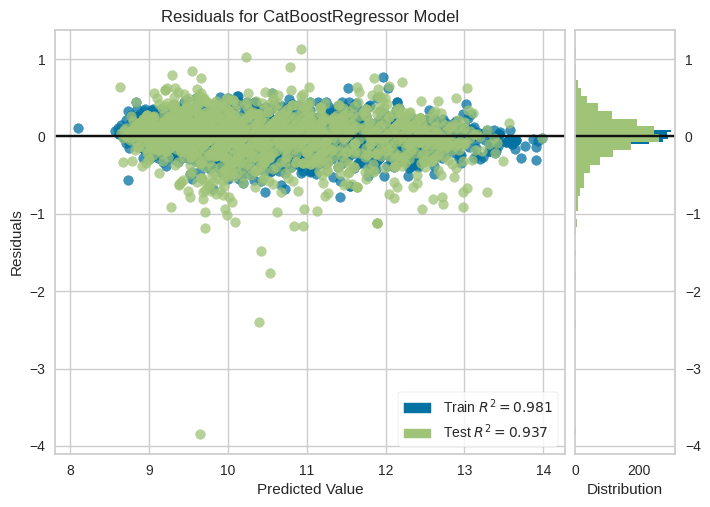

In [16]:
# plot residuals
plot_model(best, plot = 'residuals')

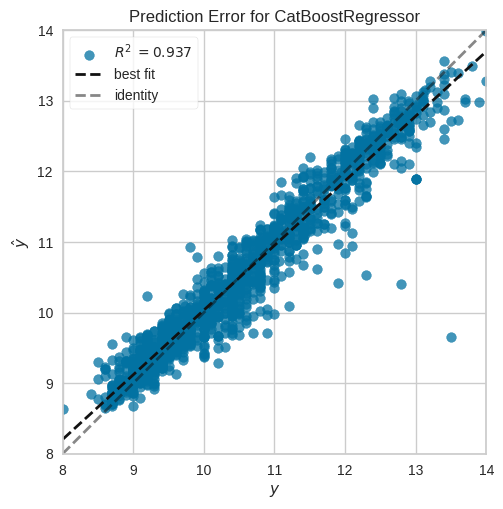

In [17]:
# plot error
plot_model(best, plot = 'error')

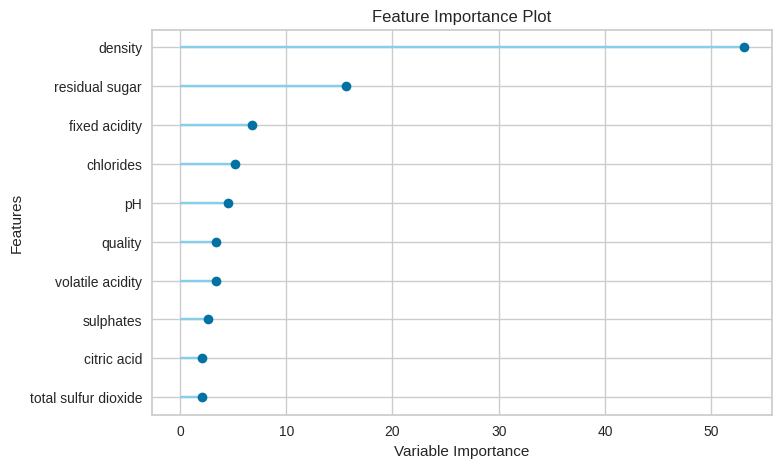

In [18]:
# plot feature importance
plot_model(best, plot = 'feature')

In [51]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [19]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [20]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2185,0.1002,0.3165,0.9366,0.0270,0.0206


In [21]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
549,7.2,0.46,0.65,10.4,0.050,76.0,192.0,0.99760,3.16,0.42,5,8.7,8.871678
2717,6.8,0.16,0.29,10.4,0.046,59.0,143.0,0.99518,3.20,0.40,6,10.8,10.376887
1925,6.3,0.20,0.58,1.4,0.204,15.0,97.0,0.99310,3.16,0.43,6,10.0,9.433561
2195,6.8,0.25,0.18,1.4,0.056,13.0,137.0,0.99350,3.11,0.42,5,9.5,9.379349
1152,6.1,0.60,0.00,1.3,0.042,24.0,79.0,0.99370,3.31,0.38,4,9.4,9.212183


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [22]:
# copy data and drop charges

new_data = df_wine.copy()
new_data.drop('alcohol', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6


In [23]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,6,8.812890
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,6,9.507914
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,6,10.578698
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,9.896307
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,9.896307


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [24]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x79c129bd3a30>)

In [25]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x79c129e2c730>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [26]:
s = setup(df_wine, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [27]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [28]:
# lets access X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
773,6.1,0.27,0.30,16.700001,0.039,49.0,172.0,0.99985,3.40,0.45,5.0
3019,7.2,0.32,0.30,8.250000,0.020,14.0,104.0,0.99362,2.99,0.44,6.0
3164,7.8,0.30,0.36,4.600000,0.024,20.0,198.0,0.99222,3.06,0.66,6.0
445,7.1,0.32,0.32,11.000000,0.038,16.0,66.0,0.99370,3.24,0.40,3.0
3890,6.4,0.38,0.26,8.200000,0.043,28.0,98.0,0.99234,2.99,0.31,6.0
...,...,...,...,...,...,...,...,...,...,...,...
1593,8.6,0.16,0.49,7.300000,0.043,9.0,63.0,0.99530,3.13,0.59,6.0
4060,6.4,0.41,0.01,6.100000,0.048,20.0,70.0,0.99362,3.19,0.42,5.0
1346,7.0,0.46,0.39,6.200000,0.039,46.0,163.0,0.99280,3.21,0.35,7.0
3454,5.8,0.54,0.00,1.400000,0.033,40.0,107.0,0.98918,3.26,0.35,5.0


In [29]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [30]:
# init setup with normalize = True
s = setup(df_wine, target = 'alcohol', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [31]:
# Check the column names in the transformed training data
get_config('X_train_transformed').columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'quality'],
      dtype='object')

<Axes: >

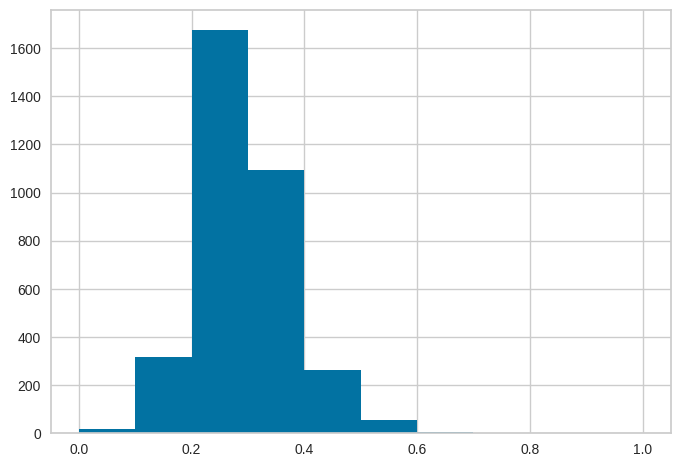

In [32]:
get_config('X_train_transformed')['fixed acidity'].hist()


Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

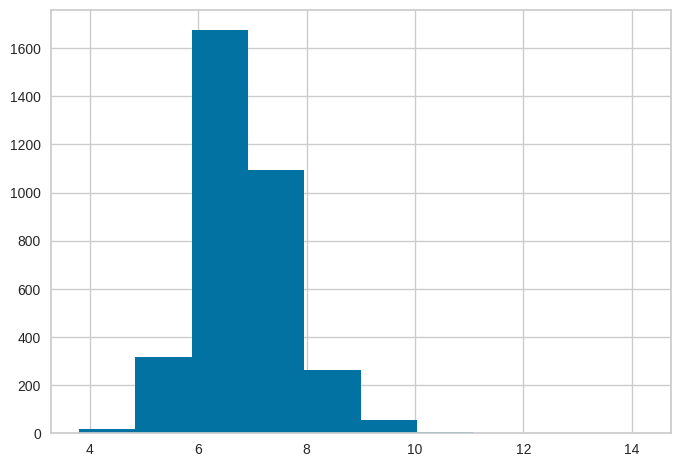

In [33]:
get_config('X_train')['fixed acidity'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [34]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2269,0.0976,0.3112,0.9345,0.0270,0.0216,3.4870
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,1.6500
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.4430
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,2.1680
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,1.2710
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.8010
dt,Decision Tree Regressor,0.3049,0.2406,0.4889,0.8388,0.0421,0.0288,0.1220
huber,Huber Regressor,0.2817,0.2378,0.4404,0.8352,0.0344,0.0271,0.1700
lar,Least Angle Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0390
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0440


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [35]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [36]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,1.9490
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.3650
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,2.0760
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,1.1590
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.5160
dt,Decision Tree Regressor,0.3049,0.2406,0.4889,0.8388,0.0421,0.0288,0.0640


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [37]:
compare_tree_models

LGBMRegressor(n_jobs=-1, random_state=123)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [38]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,1.949
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.365
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,2.076
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,1.159
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.516
dt,Decision Tree Regressor,0.3049,0.2406,0.4889,0.8388,0.0421,0.0288,0.064


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [39]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,1.2270
catboost,CatBoost Regressor,0.2269,0.0976,0.3112,0.9345,0.0270,0.0216,3.7920
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.3360
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,2.0820
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,2.0440
huber,Huber Regressor,0.2817,0.2378,0.4404,0.8352,0.0344,0.0271,0.1930
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.5070
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0430
lar,Least Angle Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0390
br,Bayesian Ridge,0.3045,0.2410,0.4516,0.8337,0.0355,0.0293,0.0730


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [40]:
# list of top 3 models by MAE
best_mae_models_top3

[ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [ ]:
# from pycaret.regression import *
# s = setup(data, target = 'charges', log_experiment='mlflow', experiment_name='insurance_experiment')

In [ ]:
# compare models
# best = compare_models()

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [ ]:
# help(setup)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [41]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [46]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2076,0.0987,0.3142,0.9313,0.0269,0.0195
1,0.2429,0.1693,0.4115,0.8891,0.0346,0.0224
2,0.2387,0.1483,0.3850,0.8960,0.0331,0.0222
3,0.2244,0.1162,0.3409,0.9257,0.0289,0.0209
4,0.2478,0.1512,0.3888,0.9029,0.0331,0.0234
5,0.2296,0.1169,0.3419,0.9141,0.0296,0.0219
6,0.2499,0.1429,0.3781,0.8966,0.0335,0.0243
7,0.2031,0.0998,0.3159,0.9380,0.0271,0.0192
8,0.2027,0.1034,0.3215,0.9271,0.0281,0.0195


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [47]:
et_results = pull()
print(type(et_results))
et_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2076,0.0987,0.3142,0.9313,0.0269,0.0195
1,0.2429,0.1693,0.4115,0.8891,0.0346,0.0224
2,0.2387,0.1483,0.3850,0.8960,0.0331,0.0222
3,0.2244,0.1162,0.3409,0.9257,0.0289,0.0209
4,0.2478,0.1512,0.3888,0.9029,0.0331,0.0234
5,0.2296,0.1169,0.3419,0.9141,0.0296,0.0219
6,0.2499,0.1429,0.3781,0.8966,0.0335,0.0243
7,0.2031,0.0998,0.3159,0.9380,0.0271,0.0192
8,0.2027,0.1034,0.3215,0.9271,0.0281,0.0195


In [52]:
# train linear regression with fold=3
et = create_model('et', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2577,0.1590,0.3988,0.8938,0.0340,0.0239
1,0.2490,0.1393,0.3732,0.9055,0.0322,0.0237
2,0.2367,0.1217,0.3489,0.9214,0.0304,0.0226
Mean,0.2478,0.1400,0.3736,0.9069,0.0322,0.0234
Std,0.0086,0.0152,0.0204,0.0113,0.0015,0.0006


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
# train linear regression with specific model parameters
create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2076,0.0987,0.3142,0.9313,0.0269,0.0195
1,0.2429,0.1693,0.4115,0.8891,0.0346,0.0224
2,0.2387,0.1483,0.3850,0.8960,0.0331,0.0222
3,0.2244,0.1162,0.3409,0.9257,0.0289,0.0209
4,0.2478,0.1512,0.3888,0.9029,0.0331,0.0234
5,0.2296,0.1169,0.3419,0.9141,0.0296,0.0219
6,0.2499,0.1429,0.3781,0.8966,0.0335,0.0243
7,0.2031,0.0998,0.3159,0.9380,0.0271,0.0192
8,0.2027,0.1034,0.3215,0.9271,0.0281,0.0195


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [56]:
# train lr and return train score as well alongwith CV
create_model('et', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [57]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2870,0.2026,0.4501,0.8591,0.0394,0.0275
1,0.3338,0.3038,0.5512,0.8010,0.0470,0.0310
2,0.3113,0.2321,0.4818,0.8372,0.0407,0.0287
3,0.3343,0.3154,0.5616,0.7983,0.0478,0.0312
4,0.3269,0.2613,0.5111,0.8322,0.0444,0.0314
5,0.3047,0.2346,0.4844,0.8277,0.0424,0.0291
6,0.2942,0.2186,0.4675,0.8419,0.0412,0.0286
7,0.2872,0.2196,0.4687,0.8636,0.0402,0.0271
8,0.2953,0.2363,0.4861,0.8332,0.0413,0.0280


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [58]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3396,0.2094,0.4576,0.8543,0.0402,0.0327
1,0.3678,0.2901,0.5386,0.8099,0.0459,0.0343
2,0.3523,0.2269,0.4763,0.8408,0.0409,0.0329
3,0.3444,0.2530,0.5030,0.8382,0.0434,0.0323
4,0.3670,0.2616,0.5114,0.8320,0.0443,0.0352
5,0.3515,0.2249,0.4742,0.8348,0.0409,0.0335
6,0.3254,0.2025,0.4500,0.8536,0.0398,0.0317
7,0.3254,0.2146,0.4633,0.8667,0.0393,0.0305
8,0.3316,0.2147,0.4634,0.8484,0.0403,0.0321


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [40]:
dt

DecisionTreeRegressor(random_state=229)

In [59]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2870,0.2026,0.4501,0.8591,0.0394,0.0275
1,0.3338,0.3038,0.5512,0.8010,0.0470,0.0310
2,0.3113,0.2321,0.4818,0.8372,0.0407,0.0287
3,0.3343,0.3154,0.5616,0.7983,0.0478,0.0312
4,0.3269,0.2613,0.5111,0.8322,0.0444,0.0314
5,0.3047,0.2346,0.4844,0.8277,0.0424,0.0291
6,0.2942,0.2186,0.4675,0.8419,0.0412,0.0286
7,0.2872,0.2196,0.4687,0.8636,0.0402,0.0271
8,0.2953,0.2363,0.4861,0.8332,0.0413,0.0280


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3396,0.2094,0.4576,0.8543,0.0402,0.0327
1,0.3678,0.2901,0.5386,0.8099,0.0459,0.0343
2,0.3523,0.2269,0.4763,0.8408,0.0409,0.0329
3,0.3444,0.2530,0.5030,0.8382,0.0434,0.0323
4,0.3670,0.2616,0.5114,0.8320,0.0443,0.0352
5,0.3515,0.2249,0.4742,0.8348,0.0409,0.0335
6,0.3254,0.2025,0.4500,0.8536,0.0398,0.0317
7,0.3254,0.2146,0.4633,0.8667,0.0393,0.0305
8,0.3316,0.2147,0.4634,0.8484,0.0403,0.0321


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [61]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=1.0,
                      min_impurity_decrease=0.01, min_samples_leaf=2,
                      min_samples_split=9, random_state=123)

In [62]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'density',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'quality'],
                                                                 tran...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                   

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [ ]:
!pip install optuna
!pip install pycaret[tuners]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
!pip show optuna
!pip show pycaret


Name: optuna
Version: 4.1.0
Summary: A hyperparameter optimization framework
Home-page: https://optuna.org/
Author: Takuya Akiba
Author-email: 
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: alembic, colorlog, numpy, packaging, PyYAML, sqlalchemy, tqdm
Required-by: optuna-integration
Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(tune_model)

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [63]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2314,0.1031,0.3210,0.9283,0.0278,0.0219
1,0.2675,0.1687,0.4107,0.8895,0.0345,0.0249
2,0.2670,0.1367,0.3697,0.9041,0.0316,0.0249
3,0.2696,0.1688,0.4108,0.8921,0.0354,0.0251
4,0.2662,0.1413,0.3759,0.9093,0.0323,0.0253
5,0.2531,0.1306,0.3613,0.9041,0.0312,0.0240
6,0.2927,0.1677,0.4095,0.8787,0.0362,0.0284
7,0.2290,0.1066,0.3264,0.9338,0.0282,0.0216
8,0.2552,0.1247,0.3531,0.9120,0.0308,0.0246


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [64]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2125,0.1143,0.3381,0.9205,0.0291,0.0200
1,0.2345,0.1785,0.4225,0.8831,0.0354,0.0215
2,0.2377,0.1492,0.3862,0.8953,0.0330,0.0220
3,0.2412,0.1551,0.3938,0.9008,0.0337,0.0224
4,0.2166,0.1293,0.3596,0.9170,0.0306,0.0202
5,0.2425,0.1443,0.3799,0.8940,0.0327,0.0230
6,0.2424,0.1464,0.3826,0.8941,0.0337,0.0234
7,0.1873,0.0973,0.3119,0.9396,0.0270,0.0177
8,0.2216,0.1252,0.3539,0.9116,0.0308,0.0213


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [65]:
# top 3 models based on mae
best_mae_models_top3

[ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

In [70]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1950,0.0740,0.2720,0.9485,0.0235,0.0185
1,0.2282,0.1425,0.3776,0.9066,0.0317,0.0211
2,0.2281,0.1124,0.3353,0.9211,0.0287,0.0213
3,0.2156,0.0983,0.3135,0.9371,0.0267,0.0201
4,0.2261,0.1100,0.3317,0.9294,0.0284,0.0215
5,0.2176,0.0937,0.3062,0.9311,0.0266,0.0208
6,0.2239,0.1042,0.3228,0.9246,0.0288,0.0219
7,0.1976,0.0810,0.2847,0.9497,0.0246,0.0187
8,0.1915,0.0794,0.2818,0.9440,0.0247,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x79c151203ac0>),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          earl...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=123, ...))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [71]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2043,0.0744,0.2728,0.9482,0.0237,0.0195
1,0.2360,0.1398,0.3739,0.9084,0.0314,0.0219
2,0.2317,0.1048,0.3237,0.9265,0.0279,0.0218
3,0.2178,0.0903,0.3004,0.9423,0.0258,0.0205
4,0.2336,0.1060,0.3256,0.9319,0.0281,0.0223
5,0.2304,0.0957,0.3093,0.9297,0.0269,0.0220
6,0.2259,0.0985,0.3139,0.9288,0.0280,0.0221
7,0.2037,0.0825,0.2872,0.9488,0.0249,0.0192
8,0.2004,0.0764,0.2764,0.9461,0.0244,0.0194


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x79c10bfd5ff0>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cp...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

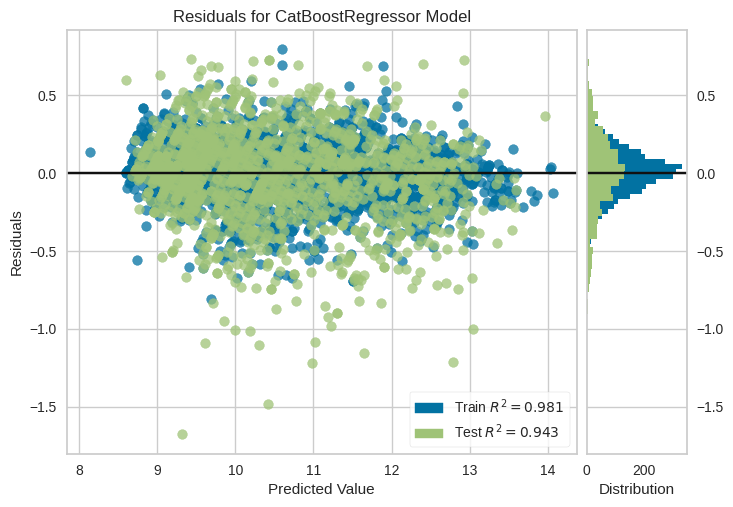

In [79]:
# plot residuals
plot_model(best, plot = 'residuals')

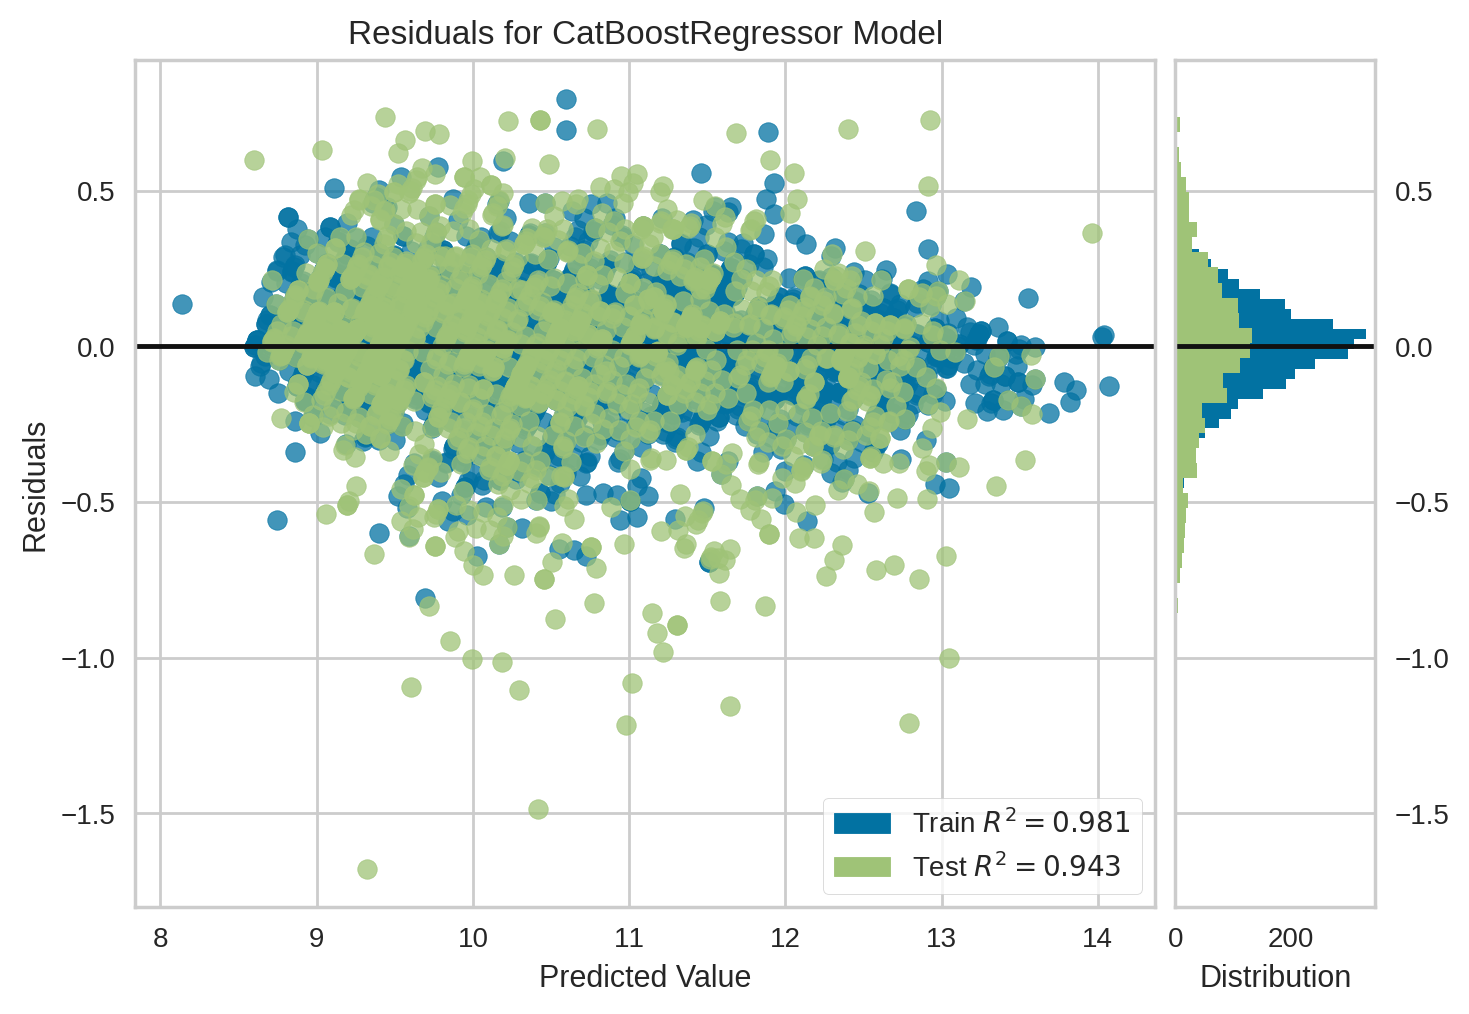

In [80]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [81]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [82]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2367,0.0923,0.3039,0.9358,0.0263,0.0225
1,0.2647,0.1542,0.3927,0.8990,0.0332,0.0247
2,0.2489,0.1065,0.3264,0.9252,0.0281,0.0235
3,0.2531,0.1169,0.3419,0.9252,0.0292,0.0237
4,0.2494,0.1179,0.3434,0.9243,0.0297,0.0239
5,0.2412,0.1019,0.3192,0.9252,0.0277,0.0230
6,0.2454,0.1162,0.3408,0.9160,0.0303,0.0240
7,0.2340,0.1039,0.3224,0.9354,0.0277,0.0220
8,0.2289,0.0950,0.3082,0.9330,0.0270,0.0221


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

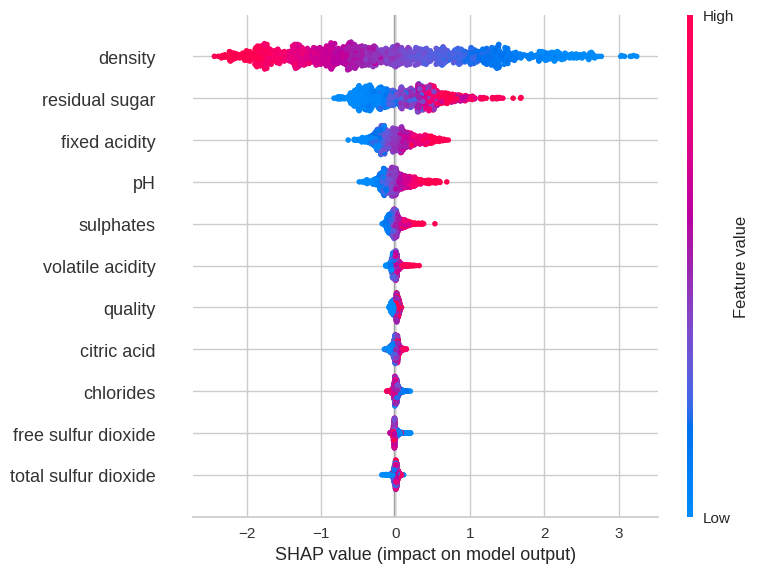

In [83]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [84]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [85]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/62 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(exclude=None,\n ...",0.3044,0.2410,0.4514,0.8337,0.0355,0.0293
1,Lasso Regression,"(TransformerWrapper(exclude=None,\n ...",1.0350,1.5118,1.2289,-0.0087,0.1053,0.0985
2,Ridge Regression,"(TransformerWrapper(exclude=None,\n ...",0.4269,0.3560,0.5847,0.7587,0.0484,0.0407
3,Elastic Net,"(TransformerWrapper(exclude=None,\n ...",1.0350,1.5118,1.2289,-0.0087,0.1053,0.0985
4,Least Angle Regression,"(TransformerWrapper(exclude=None,\n ...",0.3044,0.2410,0.4514,0.8337,0.0355,0.0293
5,Lasso Least Angle Regression,"(TransformerWrapper(exclude=None,\n ...",1.0350,1.5118,1.2289,-0.0087,0.1053,0.0985
6,Orthogonal Matching Pursuit,"(TransformerWrapper(exclude=None,\n ...",0.8787,1.2399,1.1128,0.1710,0.0934,0.0838
7,Bayesian Ridge,"(TransformerWrapper(exclude=None,\n ...",0.3045,0.2410,0.4516,0.8337,0.0355,0.0293
8,Passive Aggressive Regressor,"(TransformerWrapper(exclude=None,\n ...",0.7167,0.8702,0.8435,0.4031,0.0742,0.0683


In [86]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_feature...
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           objective='reg:squarederror', ...))],
                                 n_jobs=-1, verbose=False, weights=None)]],
         verbose=False)

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [87]:
# find best model based on CV metrics
automl()

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [88]:
pip install pycaret[analysis]

In [104]:
!pip install pycaret[mlops]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147

In [4]:
dashboard(dt, display_format ='inline')


Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅Create App
This function creates a basic gradio app for inference.

In [77]:
create_app(best)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fb25b8bbd30c21020d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [78]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [79]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [ ]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [80]:
final_best = finalize_model(best)

In [81]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7c938b2300d0>)])

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [82]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[7] <= 0.9926950037479401) {
            if (input[7] <= 0.9903749823570251) {
                if (input[7] <= 0.9896349906921387) {
                    if (input[7] <= 0.9886099994182587) {
                        if (input[7] <= 0.988224983215332) {
                            if (input[8] <= 3.3149999380111694) {
                                if (input[10] <= 6.5) {
                                    if (input[6] <= 97.5) {
                                        var0 = 13.600000381469727;
                                    } else {
                                        if (input[0] <= 5.25) {
                                            var0 = 13.5;
                                        } else {
                                            var0 = 13.550000190734863;
                                        }
                                    }
                         

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [83]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model

In [84]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7c93885cfb80>)])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [85]:
# save experiment
save_experiment('my_experiment')

In [87]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=df_wine)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple
